<center> <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> Laboratorio 1 </font> <br> <br>
    
<center><font color=#555555><font size=5> Inversión pasiva y activa </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> Jesús Iván Lafarga Lizarrga </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> 09 - 2022</a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/ivanLafarga/lab1_myst_ILafarga'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Inversión pasiva </font> <br> <br> <font color= #555555> <font size = 5> Análisis del rendimiento de una inversión pasiva </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  Include here a description of the whole work, use no more than 400 words, you can use **Bold** and *Italic* highlights, also you can inclue [links](www.iteso.mx). Usually is a good strategy to generate this text at the very end of the process, since you have to include all aspects of the work, from a brief introduction, to problem definitions and methods used, to finally the results found. </font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

El motivo de este laboratirio es construir una serie de tiempo, de periodicidad mensual, donde para cada fecha en la que se tiene el rebalanceo (archivos) tendrá un valor calculado del ETF, se considera un capital inicial de 1 Millón de pesos.

•	Las bases de datos utilizadas en este laboratorio fueron una referencia de un ETF, el NAFTRAC, que representa al S&P/BMV IPC. El NAFTRAC, el cual es un certificado de Participación Ordinaria no amortizable, emitido por Nacional Financiera. Es un instrumento financiero que confiere a sus tenedores el derecho a una parte alícuota de un portafolio de acciones fideicomitidas. Es el primer instrumento en su tipo en Latinoamérica.Está indexado al Índice de Precios y Cotizaciones de la Bolsa Mexicana de Valores en un 100% y facilita a pequeños inversionistas el acceso a inversiones patrimoniales.

•	Referente a este certificado se utilizarón las bases de datos mensuales de las acciones que lo conforman un periodo de 2 años en las fechas que van de 31 enero al 2020 a 29 de julio del año 2022, consideran las comisiones a pagar por cada rebalanceo = 0.00125 del valor de la operación (títulos*precio*comisión) ya que solo se permiten operaciones de compra (posición en largo).

•	Las operaciones se ejecutan al precio de mercado y se considera un solo precio de compra o de venta para todos los títulos en la operación.

•	Calcula el valor de ese portafolio para todas las fechas utilizando los archivos históricos.
Como es Inversión Pasiva, la cual es en un enfoque de inversión a largo plazo con el objetivo de crear riqueza gradualmente a lo largo del tiempo. Al minimizar la compra y jde costos. Se forma un portafolio con las ponderaciones del primer mes y se calculaa sus comisiones.


<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 2.1 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0
- yfinance

## <font color= #6B6B6B> 2.2 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/NAFTRAC_2020_2022: Carpeta con los archivos historicos de NAFTRAC.

## <font color= #6E6E6E> 2.3 Install Packages</font>

In [1]:
import main as mn

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

# <font color= #6B6B6B> 3. Proceso de inversión pasiva </font>

<hr style="border:0.02in solid gray"> </hr>

En la siguiente tabla se compone de los activos que componen el NAFTRAC dentro de la fecha correspondiente a enero de 2020, presetna el ticker de la acción , su peso dentr del ETF , el peso del activo expresado en su valor monetario, la comisión que se pagara por la transacción, el precio de cierre obtenido por Yahoo finance y el numero de titulos obtenidos por la compra.

Del monto monetario para invertir se utilizaron $951,700.0 para la adquisición de los titulos de las accoiones así como $1,189.625 en el pago de comisión por adquisión de estos mismos. 

In [2]:
mn.datos.head()


,Ticker,Peso (%),Valor monetario,Comision,Precio cierre,Títulos
Ticker,,,,,,
AMXL.MX,AMXL.MX,0.1370,137000.0,171.250,15.695000,8728.0
FEMSAUBD.MX,FEMSAUBD.MX,0.1185,118500.0,148.125,170.255005,696.0
GFNORTEO.MX,GFNORTEO.MX,0.1064,106400.0,133.000,116.129997,916.0
WALMEX.MX,WALMEX.MX,0.1039,103900.0,129.875,55.220001,1881.0
GMEXICOB.MX,GMEXICOB.MX,0.0603,60300.0,75.375,50.215000,1200.0


<br>

In [3]:
mn.datos['Valor monetario'].sum()

951700.0

In [4]:
mn.datos['Comision'].sum()

1189.625

Comenzamos en la fecha de 2020-01-31 en la tabla , momento exacto donde se presenta el capital de \$997,655.474 el cual es el monto inicial del portafolio; en el transcurso de 2 años y 6 mese, es decir, llegando a finales del mes de julio terminamos con esta cantidad \$1,098,429.00 esto representa un rendimiento de 14.3124\%.

In [5]:
display(mn.df_final.head())

display(mn.df_final.tail())

,Capital,Rendimiento,Rendimiento acum
2020-01-31,997655.474108,NaN,NaN
2020-02-28,934426.744135,-0.063377,-0.063377
2020-03-31,786764.762403,-0.158024,-0.221401
2020-04-30,834759.035030,0.061002,-0.160399
2020-05-29,831794.581326,-0.003551,-0.163951


,Capital,Rendimiento,Rendimiento acum
2022-03-31,1.286889e+06,0.060763,0.294004
2022-04-29,1.171614e+06,-0.089576,0.204427
2022-05-31,1.178108e+06,0.005543,0.209970
2022-06-30,1.087327e+06,-0.077056,0.132914
2022-07-29,1.098429e+06,0.010210,0.143124


La siguente gráfica muestra el rendimiento acomulado durante periodo de inversión 

<AxesSubplot:>

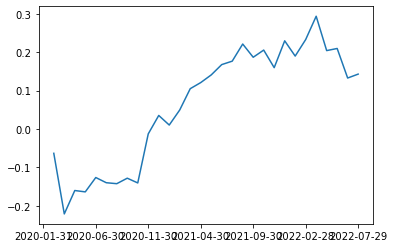

In [6]:
mn.df_final['Rendimiento acum'].plot()

# <font color= #6B6B6B> 4. Métricas de atribución al desempeño  </font>

<hr style="border:0.02in solid gray"> </hr>

Se presenta un rendimiento acomulado bueno,se presenta como una ganancia total percibida al finalizar la inversión, el cual es de 14.314\%  además los resultados muestran al rendimiento mensual promedio en 0.4771 % y obteniendo un radio sharpe -68.0206 % ya que esto refiere a que la tasa libre de riego de este portafolo fue mayor que le rendimiento promedio mensual.

In [8]:
mn.df_medidas


,Inversion pasiva
Rendimiento mensual acumulado,0.143124
Rendimiento mensual promedio,0.004771
Radio de sharpe,-0.680206


<br>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).